<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/DBD_Engine3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-31-7efff3dfffd3>:57: RuntimeWarning: overflow encountered in multiply
  dEe_dt -= nu_en*(Te - T)
<ipython-input-31-7efff3dfffd3>:58: RuntimeWarning: invalid value encountered in add
  Te += dt*dEe_dt/(3/2*n*kb)


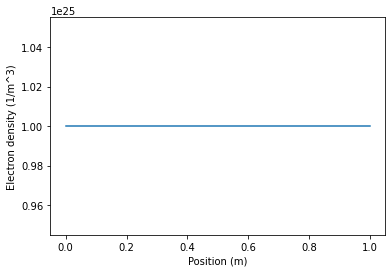

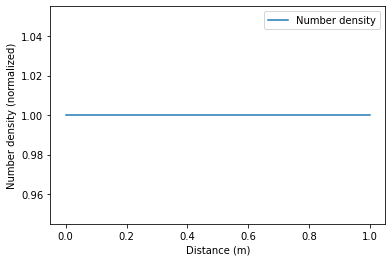

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
e = 1.602e-19  # electron charge (C)
m = 9.109e-31  # electron mass (kg)
kb = 1.381e-23  # Boltzmann constant (J/K)
T = 300  # temperature (K)
dx = 1e-3  # spatial step size (m)
dt = 1e-10  # time step size (s)
tmax = 1e-6  # maximum simulation time (s)

# Grid
nx = 1001
x = np.linspace(0, (nx-1)*dx, nx)

# Initial conditions
nm0=1     # initial momentum (kg.m/s)
n0 = 1e25  # initial electron density (1/m^3)
J0 = 0  # initial current density (A/m^2)
E0 = 0  # initial electric field (V/m)

nm= np.ones(nx+2)*nm0
n = np.ones(nx)*n0
J = np.ones(nx)*J0
E = np.ones(nx)*E0

# Calculate electron velocity
Te = T*e/kb  # electron temperature (K)
ve = np.sqrt((8*kb*Te)/(np.pi*m))

# Calculate electron collision parameters
nu_en = 3.66e6*n*np.sqrt(Te)*1e-20  # electron-neutral collision frequency (1/s)
lambda_e = ve/nu_en  # electron mean free path (m)

# Time loop
t = 0
while t < tmax:
    # Calculate electric field
    E = -np.gradient(E, dx)

    # Calculate electron velocity
    Ee = np.cumsum(E)*dx
    Ee -= Ee.mean()
    ve = ve + dt*(-ve/lambda_e + e*Ee/m)

    # Calculate momentum balance
    nm[1:-1] += dt*(-np.gradient(J, dx)/e)

    # Calculate species balance
 #   n[1:-1] += dt*(-n[1:-1]*np.gradient(ve, dx))
#    n[1:-1] += dt*(-n[1:-1]*np.gradient(ve, dx))
    n[1:-1] += dt*(-n[1:-1]*np.gradient(ve[1:-1], dx))

    # Calculate electron energy balance
    dEe_dt = e*Ee*J/m
    dEe_dt -= nu_en*(Te - T)
    Te += dt*dEe_dt/(3/2*n*kb)

    # Calculate electric current
    J[1:-1] = e*n[1:-1]*ve[1:-1] - e*n[1:-1]*lambda_e[1:-1]*E[1:-1]/2

    # Increment time
    t += dt

plt.plot(x, n)
plt.xlabel('Position (m)')
plt.ylabel('Electron density (1/m^3)')
plt.show()

# Plot results
plt.figure()
plt.plot(x, n/n0, label='Number density')
plt.xlabel('Distance (m)')
plt.ylabel('Number density (normalized)')
plt.legend()

plt.show()
